In [1]:
import torch 
import cv2
from PIL import Image
import numpy as np
import io
import matplotlib.pyplot as plt
import time 

In [2]:

# from roboflow import Roboflow
# rf = Roboflow(api_key="1cXudsdiREZcNxGiZLeY")
# project = rf.workspace("capstone-psuxr").project("capstone-7fuz5")
# # dataset = project.version(4).download("yolov8")


In [3]:
img_path = r'C:\capstone\3dFloorplan - Copy\Capstone-4\valid\images\16_jpg.rf.21cbc6ecfeec59d54a1af55ead68c60c.jpg'

# Model for walls and windows 

In [4]:

# from roboflow import Roboflow
# rf = Roboflow(api_key="1cXudsdiREZcNxGiZLeY")
# project = rf.workspace().project("capstone-7fuz5")
# model = project.version(4).model

# # infer on a local image
# # predictions  =model.predict("/workspaces/Capstone/Capstone-4/valid/images/16_jpg.rf.21cbc6ecfeec59d54a1af55ead68c60c.jpg", confidence=40, overlap=30).json()

In [5]:
# import torch 
# torch.save(model, 'C:/capstone/eddie/Models/floorplanDetect2.pt')



In [6]:
# import torch 
# mymodel = torch.load(r'C:\capstone\eddie\Models\floorplanDetect2.pt')

In [7]:
# predictions = mymodel.predict(img_path, confidence=40, overlap=30).json()

In [8]:
# predictions

## View the predictions 

In [9]:
import cv2
from PIL import Image
import numpy as np
import io
import matplotlib.pyplot as plt
import time 

def ViewBoundingBox(img_path,predictions):
    # Load the image using OpenCV
    image = cv2.imread(img_path)


    # image = image.resize((640, 640))
    # Define the color mappings for each class
    color_mapping = {
    'room': (255, 0, 0),       # Blue
    'window': (0, 255, 0),     # Green
    'wc': (255, 165, 0),       # Orange
    'toilet': (0, 0, 255),   # red
    'sofa': (0, 255, 255),     # Yellow
    'kitchen': (255, 255, 0),  # Cyan
    'bed': (180, 105, 255),    # Pink
    'storage': (42, 42, 165),  # Brown
    'tv': (128, 128, 128),     # Gray
    'dining_table': (255, 0, 255) , # Magenta
    'Walls': (128, 128, 128)
}
    mask = np.zeros((640, 640), dtype=np.uint8)
    # Iterate through the predictions
    for bounding_box in predictions['predictions']:
        x = int(bounding_box['x'])
        y = int(bounding_box['y'])
        width = int(bounding_box['width'])
        height = int(bounding_box['height'])
        confidence = bounding_box['confidence']
        class_name = bounding_box['class']
        x0 = bounding_box['x'] - bounding_box['width'] / 2
        x1 = bounding_box['x'] + bounding_box['width'] / 2
        y0 = bounding_box['y'] - bounding_box['height'] / 2
        y1 = bounding_box['y'] + bounding_box['height'] / 2
        start_point = (int(x0), int(y0))
        end_point = (int(x1), int(y1))
        # Get the color for the current class
        color = color_mapping.get(class_name, (128, 128, 128))  # Green color as default if the class is not in the mapping

        # Draw the bounding box on the image using the corresponding color
        cv2.rectangle(image,  start_point, end_point, color=color, thickness=2)
        cv2.putText(image, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
    # Convert the OpenCV image to PIL format
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Create a BytesIO object to store the image data
    image_stream = io.BytesIO()

    # Save the image with bounding boxes to the BytesIO stream
    image_pil.save(image_stream, format='PNG')

    # Rewind the stream to the beginning
    image_stream.seek(0)

    # Display the image in the notebook
    return Image.open(image_stream)

### Creates 3d Model of only walls 

In [10]:
# import bpy

# # Clear existing objects in the scene
# bpy.ops.object.select_all(action='DESELECT')
# bpy.ops.object.select_by_type(type='MESH')
# bpy.ops.object.delete()

# # Define the bounding box values


# # Create a cube object for each bounding box
# for bbox in predictions['predictions']:
#     x = bbox['x']
#     y = bbox['y']
#     width = bbox['width']
#     height = bbox['height']
#     obj_class = bbox['class']
#     # Calculate the coordinates of the bounding box corners
#     x1 = x
#     y1 = y
#     x2 = x + width
#     y2 = y + height
#     x0 = bounding_box['x'] - bounding_box['width'] / 2
#     x1 = bounding_box['x'] + bounding_box['width'] / 2
#     y0 = bounding_box['y'] - bounding_box['height'] / 2
#     y1 = bounding_box['y'] + bounding_box['height'] / 2
    
#     # Create a cube mesh
#     bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
#     cube = bpy.context.object
    
#     # Scale the cube to match the bounding box dimensions
#     cube.scale.x = width 
#     cube.scale.y = height
#     cube.scale.z = 150 
    
#     # Position the cube at the center of the bounding box
#     cube.location.x = x
#     cube.location.y = y 
#     cube.location.z = 0.5  # Set the desired height of the bounding box
    
#     # Assign a material to the cube
#     material = bpy.data.materials.new(name="BoundingBoxMaterial")
#     if obj_class == 'window':
#         material.diffuse_color = (1, 0, 0, 1) # red color for windows
#         # Create a hole in the cube for windows using a Boolean modifier
#         bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
#         hole_cube = bpy.context.object
#         hole_cube.scale.x = width -10
#         hole_cube.scale.y = height +50
#         hole_cube.scale.z = 50  # Increase the height of the hole cube
#         hole_cube.location.x = x
#         hole_cube.location.y = y
#         hole_cube.location.z = 0.6  # Set the height above the main cube
#         cube.modifiers.new(name="Boolean", type='BOOLEAN')
#         cube.modifiers['Boolean'].operation = 'DIFFERENCE'
#         cube.modifiers['Boolean'].object = hole_cube
#         # cube.modifiers['Boolean'].overlap_threshold = 0.0
#         hole_cube.hide_viewport = True  # Hide the hole cube from the viewport
#         hole_cube.hide_render = True
        
#     else:
#         material.diffuse_color = (0, 0, 1, 1)   # blu color for walls
#     cube.data.materials.append(material)

# # Save the scene as a .blend file
# bpy.ops.wm.save_as_mainfile(filepath="/workspaces/Capstone/output/floorplan9.blend")

In [11]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="QJ4n9mQM9Fl0wcjuTpNy")
# project = rf.workspace().project("walldetector2")
# wallDetector = project.version(1).model

# # infer on a local image
# print(wallDetector.predict(img_path, confidence=40, overlap=30).json())

# # visualize your prediction
# # model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# # infer on an image hosted elsewhere
# # print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

In [12]:
# torch.save(wallDetector, 'C:/capstone/eddie/Models/wallDetector.pt')

In [13]:
wallDetector = torch.load(r'C:\capstone\3dFloorplan - Copy\Models\wallDetector.pt')

In [14]:
wall_predictions = wallDetector.predict(img_path, confidence=40, overlap=30).json()

In [15]:
wall_predictions

{'predictions': [{'x': 381.5,
   'y': 128.5,
   'width': 65.0,
   'height': 17.0,
   'confidence': 0.9495683908462524,
   'class': 'walls',
   'image_path': 'C:\\capstone\\3dFloorplan - Copy\\Capstone-4\\valid\\images\\16_jpg.rf.21cbc6ecfeec59d54a1af55ead68c60c.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 405.5,
   'y': 407.0,
   'width': 51.0,
   'height': 52.0,
   'confidence': 0.9491794109344482,
   'class': 'walls',
   'image_path': 'C:\\capstone\\3dFloorplan - Copy\\Capstone-4\\valid\\images\\16_jpg.rf.21cbc6ecfeec59d54a1af55ead68c60c.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 225.5,
   'y': 560.0,
   'width': 17.0,
   'height': 106.0,
   'confidence': 0.9343897104263306,
   'class': 'walls',
   'image_path': 'C:\\capstone\\3dFloorplan - Copy\\Capstone-4\\valid\\images\\16_jpg.rf.21cbc6ecfeec59d54a1af55ead68c60c.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 234.5,
   'y': 129.0,
   'width': 35.0,
   'height': 16.0,
   'confidence': 

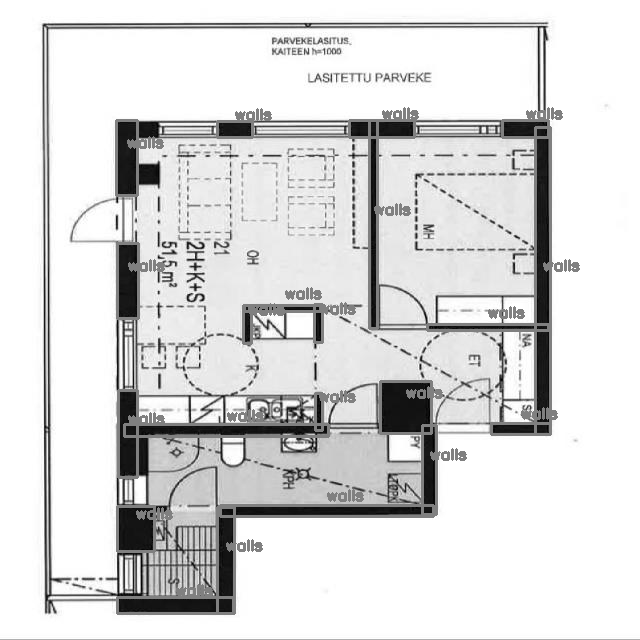

In [16]:
ViewBoundingBox(img_path = img_path , predictions = wall_predictions)

# Model for detecting door 

In [17]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="bMByyFXHx89c4mcUR4bC")
# project = rf.workspace().project("doors-vetjc")
# doormodel = project.version(1).model

# # infer on a local image



# # visualize your prediction
# # model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# # infer on an image hosted elsewhere
# # print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

In [18]:
import torch 

In [19]:

# torch.save(doormodel, 'C:/capstone/eddie/Models/DoorDetector.pt')

In [20]:
MyDoorModel = torch.load(r'C:\capstone\3dFloorplan - Copy\Models\DoorDetector.pt')
door_predictions = MyDoorModel.predict(img_path, confidence=40, overlap=30).json()

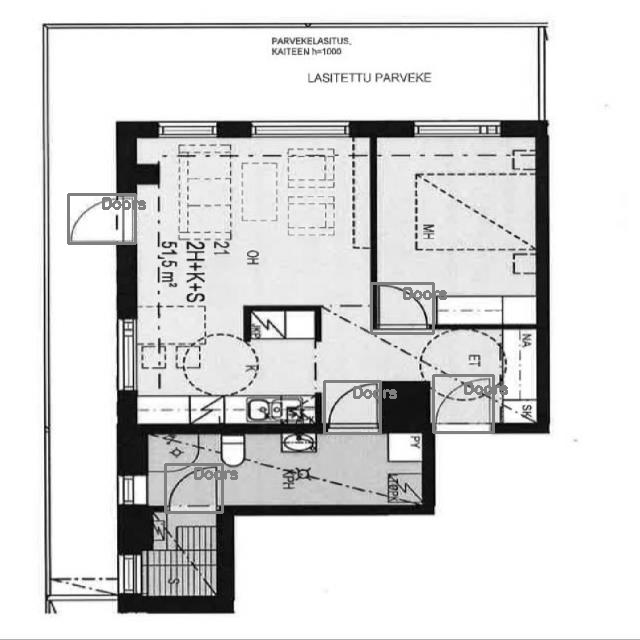

In [21]:
ViewBoundingBox(img_path=img_path, predictions =door_predictions )

# Window detection 

In [22]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="lVSZEeBNJRZMoW7ZLgHm")
# project = rf.workspace().project("window-detectiom")
# windowDetector = project.version(1).model

# # infer on a local image
# print(windowDetector.predict(img_path, confidence=40, overlap=30).json())

# # visualize your prediction
# # model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# # infer on an image hosted elsewhere
# # print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

In [23]:
# torch.save(windowDetector, 'C:/capstone/eddie/Models/windowDetector.pt')

In [24]:
MywindowModel = torch.load(r'C:\capstone\3dFloorplan - Copy\Models\windowDetector.pt')


In [25]:
window_predictions = MywindowModel.predict(img_path, confidence=40, overlap=30).json()

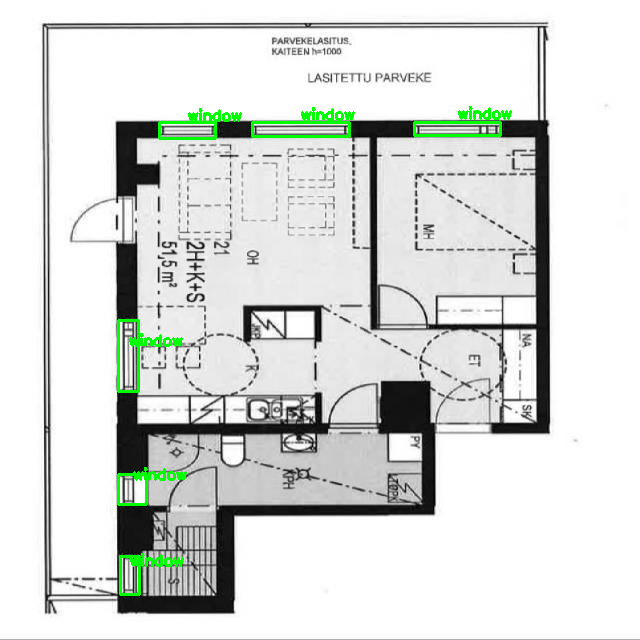

In [26]:
ViewBoundingBox(img_path,window_predictions)

# Room object detection + classification 


In [27]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="p4u1xVLa3Q0VJ3TkBd3j")
# project = rf.workspace().project("roomdetector")
# RoomDetector = project.version(5).model

# # infer on a local image
# print(RoomDetector.predict(img_path, confidence=40, overlap=30).json())

# # visualize your prediction
# # model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# # infer on an image hosted elsewhere
# # print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

In [28]:
# torch.save(RoomDetector, 'C:/capstone/eddie/Models/RoomDetector.pt')

In [29]:
MyRoomModel = torch.load(r'C:\capstone\3dFloorplan - Copy\Models\RoomDetector.pt')


In [59]:
room_predictions = MyRoomModel.predict(img_path, confidence=40, overlap=30).json()

In [60]:
room_predictions

{'predictions': [{'x': 474.0,
   'y': 214.0,
   'width': 126.0,
   'height': 124.0,
   'confidence': 0.9924880266189575,
   'class': 'bed',
   'image_path': 'C:\\capstone\\3dFloorplan - Copy\\Capstone-4\\valid\\images\\16_jpg.rf.21cbc6ecfeec59d54a1af55ead68c60c.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 456.0,
   'y': 231.0,
   'width': 154.0,
   'height': 184.0,
   'confidence': 0.9647492170333862,
   'class': 'room',
   'image_path': 'C:\\capstone\\3dFloorplan - Copy\\Capstone-4\\valid\\images\\16_jpg.rf.21cbc6ecfeec59d54a1af55ead68c60c.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 320.5,
   'y': 470.0,
   'width': 205.0,
   'height': 72.0,
   'confidence': 0.9606764912605286,
   'class': 'wc',
   'image_path': 'C:\\capstone\\3dFloorplan - Copy\\Capstone-4\\valid\\images\\16_jpg.rf.21cbc6ecfeec59d54a1af55ead68c60c.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 205.0,
   'y': 192.0,
   'width': 58.0,
   'height': 96.0,
   'confidence': 0.

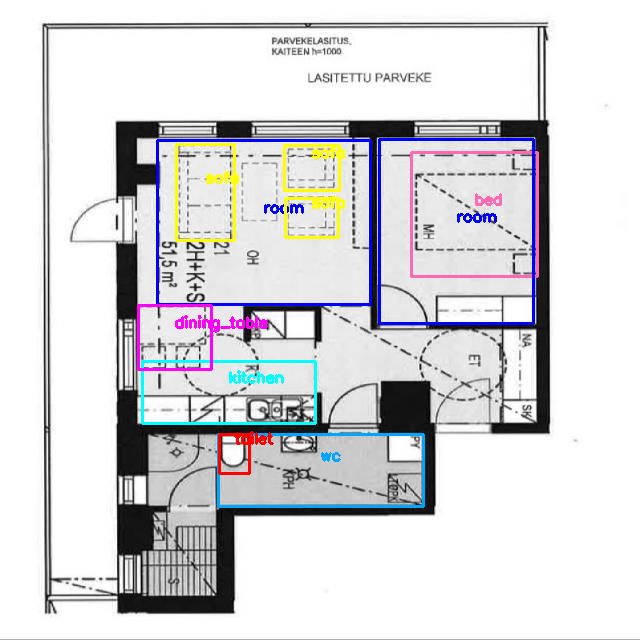

In [61]:
ViewBoundingBox(img_path=img_path,predictions=room_predictions)

## 3d model segmentation

Room segmentaions + wall window generatons 

In [33]:
# import bpy

# # Clear existing objects in the scene
# bpy.ops.object.select_all(action='DESELECT')
# bpy.ops.object.select_by_type(type='MESH')
# bpy.ops.object.delete()

# color_mapping_blender =  {
#     'room': (0.0, 0.0, 1.0, 1.0),        # Blue
#     'door': (1.0, 0.0, 0.0, 1.0),        # Red
#     'window': (0.0, 1.0, 0.0, 1.0),      # Green
#     'wc': (1.0, 0.647, 0.0, 1.0),        # Orange
#     'toilet': (0.502, 0.0, 0.502, 1.0),  # Purple
#     'sofa': (1.0, 1.0, 0.0, 1.0),        # Yellow
#     'kitchen': (0.0, 1.0, 1.0, 1.0),     # Cyan
#     'bed': (1.0, 0.412, 0.706, 1.0),     # Pink
#     'storage': (0.165, 0.165, 0.647, 1.0),  # Brown
#     'tv': (0.502, 0.502, 0.502, 1.0),    # Gray
#     'dining_table': (1.0, 0.0, 1.0, 1.0)  # Magenta
# }

# # Create a cube object for each bounding box for walls 
# for bbox in wall_predictions['predictions']:
#     x = bbox['x']
#     y = bbox['y']
#     width = bbox['width']
#     height = bbox['height']
#     obj_class = bbox['class']
#     # Calculate the coordinates of the bounding box corners
#     x1 = x
#     y1 = y
#     x2 = x + width
#     y2 = y + height
#     x0 = bbox['x'] - bbox['width'] / 2
#     x1 = bbox['x'] + bbox['width'] / 2
#     y0 = bbox['y'] - bbox['height'] / 2
#     y1 = bbox['y'] + bbox['height'] / 2
    
#     # Create a cube mesh
#     bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
#     cube = bpy.context.object
    
#     # Scale the cube to match the bounding box dimensions
#     cube.scale.x = width 
#     cube.scale.y = height
#     cube.scale.z = 150 
    
#     # Position the cube at the center of the bounding box
#     cube.location.x = x
#     cube.location.y = y 
#     cube.location.z = -150/2  # Set the desired height of the bounding box
    
#     # Assign a material to the cube
#     material = bpy.data.materials.new(name="BoundingBoxMaterial")
#     if obj_class == 'window':
#         material.diffuse_color = (0.502, 0.502, 0.502, 1.0) # red color for windows
#         # Create a hole in the cube for windows using a Boolean modifier
#         bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
#         hole_cube = bpy.context.object
#         hole_cube.scale.x = width -10
#         hole_cube.scale.y = height +50
#         hole_cube.scale.z = 50  # Increase the height of the hole cube
#         hole_cube.location.x = x
#         hole_cube.location.y = y
#         hole_cube.location.z = -150/2 # Set the height above the main cube
#         cube.modifiers.new(name="Boolean", type='BOOLEAN')
#         cube.modifiers['Boolean'].operation = 'DIFFERENCE'
#         cube.modifiers['Boolean'].object = hole_cube
#         # cube.modifiers['Boolean'].overlap_threshold = 0.0
#         hole_cube.hide_viewport = True  # Hide the hole cube from the viewport
#         hole_cube.hide_render = True
        
#     else:
#         material.diffuse_color = (0.502, 0.502, 0.502, 1.0)  
# cube.data.materials.append(material)

# for bbox in window_predictions['predictions']:
#     x = bbox['x']
#     y = bbox['y']
#     width = bbox['width']
#     height = bbox['height']
#     obj_class = bbox['class']
#     # Calculate the coordinates of the bounding box corners
#     x1 = x
#     y1 = y
#     x2 = x + width
#     y2 = y + height
#     x0 = bbox['x'] - bbox['width'] / 2
#     x1 = bbox['x'] + bbox['width'] / 2
#     y0 = bbox['y'] - bbox['height'] / 2
#     y1 = bbox['y'] + bbox['height'] / 2
    
#     # Create a cube mesh
#     bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
#     cube = bpy.context.object
    
#     # Scale the cube to match the bounding box dimensions
#     cube.scale.x = width 
#     cube.scale.y = height
#     cube.scale.z = 150 
    
#     # Position the cube at the center of the bounding box
#     cube.location.x = x
#     cube.location.y = y 
#     cube.location.z = -150/2  # Set the desired height of the bounding box
    
#     # Assign a material to the cube
#     material = bpy.data.materials.new(name="BoundingBoxMaterial")
#     if obj_class == 'window':
#         material.diffuse_color = (0.502, 0.502, 0.502, 1.0) # red color for windows
#         # Create a hole in the cube for windows using a Boolean modifier
#         bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
#         hole_cube = bpy.context.object
#         hole_cube.scale.x = width -10
#         hole_cube.scale.y = height +50
#         hole_cube.scale.z = 50  # Increase the height of the hole cube
#         hole_cube.location.x = x
#         hole_cube.location.y = y
#         hole_cube.location.z = -150/2 # Set the height above the main cube
#         cube.modifiers.new(name="Boolean", type='BOOLEAN')
#         cube.modifiers['Boolean'].operation = 'DIFFERENCE'
#         cube.modifiers['Boolean'].object = hole_cube
#         # cube.modifiers['Boolean'].overlap_threshold = 0.0
#         hole_cube.hide_viewport = True  # Hide the hole cube from the viewport
#         hole_cube.hide_render = True
        
#     else:
#         material.diffuse_color = (0.502, 0.502, 0.502, 1.0)  
# cube.data.materials.append(material)


# # Create a cube object for each bounding box room segmentaions 
# for bbox in room_predictions['predictions']:
#     x = bbox['x']
#     y = bbox['y']
#     width = bbox['width']
#     height = bbox['height']
#     obj_class = bbox['class']
#     # Calculate the coordinates of the bounding box corners
#     x1 = x
#     y1 = y
#     x2 = x + width
#     y2 = y + height
#     x0 = bbox['x'] - bbox['width'] / 2
#     x1 = bbox['x'] + bbox['width'] / 2
#     y0 = bbox['y'] - bbox['height'] / 2
#     y1 = bbox['y'] + bbox['height'] / 2
    
#     # Create a cube mesh
#     bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
#     cube = bpy.context.object
    
#     # Scale the cube to match the bounding box dimensions
#      # Set the desired height of the bounding box
    
#     # Assign a material to the cube
#     material = bpy.data.materials.new(name="BoundingBoxMaterial")
#     if obj_class == 'room' or obj_class == 'wc':
#         cube.scale.x = width 
#         cube.scale.y = height
#         cube.scale.z = 0 
        
#         # Position the cube at the center of the bounding box
#         cube.location.x = x
#         cube.location.y = y 
#         cube.location.z = 0 
#         material.diffuse_color = color_mapping_blender[obj_class]
         
#         # Create a hole in the cube for windows using a Boolean modifier
#         # bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
#         # hole_cube = bpy.context.object
#         # hole_cube.scale.x = width -10
#         # hole_cube.scale.y = height +50
#         # hole_cube.scale.z = 50  # Increase the height of the hole cube
#         # hole_cube.location.x = x
#         # hole_cube.location.y = y
#         # hole_cube.location.z = 0.6  # Set the height above the main cube
#         # cube.modifiers.new(name="Boolean", type='BOOLEAN')
#         # cube.modifiers['Boolean'].operation = 'DIFFERENCE'
#         # cube.modifiers['Boolean'].object = hole_cube
#         # # cube.modifiers['Boolean'].overlap_threshold = 0.0
#         # hole_cube.hide_viewport = True  # Hide the hole cube from the viewport
#         # hole_cube.hide_render = True
        
#     else:
#         cube.scale.x = width 
#         cube.scale.y = height
#         cube.scale.z = -20
        
#         # Position the cube at the center of the bounding box
#         cube.location.x = x
#         cube.location.y = y 
#         cube.location.z = -10
#         material.diffuse_color = color_mapping_blender[obj_class] 
         
#     cube.data.materials.append(material)

# # Save the scene as a .blend file
# bpy.ops.wm.save_as_mainfile(filepath="C:/capstone/eddie/Output/roomtest6.blend")

Floorplan with furniture 9,16,73


Room segementations with old wall generations but with furniture palcement 

In [34]:
import bpy 
import math


def place_model(obj_filepath, position, rotation, dimension):
    bpy.ops.import_scene.obj(filepath=obj_filepath)
    bed = bpy.context.selected_objects[0]
    global_coords = bed.matrix_world.translation
    print("Global Coordinates:", global_coords)

    # Get the object's local coordinates
    local_coords = bed.location
    print("Local Coordinates:", local_coords)
    # Get the object's global scale
    global_scale = bed.matrix_world.to_scale()
    print("Global Scale:", global_scale)

    # Get the object's local scale
    local_scale = bed.scale
    print("Local Scale:", local_scale)
    # x_scale_factor = 133 / bed.dimensions.x
    # y_scale_factor = 158 / bed.dimensions.y

    # # Apply the scale factors to the object
    # bed.scale.x *= x_scale_factor
    # bed.scale.y *= y_scale_factor
    
    bed.dimensions.xyz = dimension
    bed.location = position
    

    # Set the position
    # bed.location = position

    # # Set the rotation
    # Convert the rotation angles to radians
    rotation_radians = [math.radians(angle) for angle in rotation]
    bed.rotation_euler = rotation_radians

    # # Apply global scaling factor
    # global_scale = bpy.context.scene.unit_settings.scale_length
    # bed.scale *= global_scale

    # # Set the scale along multiple axes
    # bed.scale[0] *= scale[0]
    # bed.scale[1] *= scale[1]
    # bed.scale[2] *= scale[2]
    # print("Global Coordinates:", global_coords)
    # print("aftersetting =================")
    # # Get the object's local coordinates
    # local_coords = bed.location
    # print("Local Coordinates:", local_coords)
    # # Get the object's global scale
    # global_scale = bed.matrix_world.to_scale()
    # print("Global Scale:", global_scale)

    # # Get the object's local scale
    # local_scale = bed.scale
    # print("Local Scale:", local_scale)

In [35]:
def scale_object(obj, scale, scale_axis):
    obj_scale = obj.matrix_world.to_scale()
    scale_values = [scale if i == scale_axis else obj_scale[i] for i in range(3)]
    obj.scale = scale_values

In [36]:


count = 1

In [50]:
import os
import bpy

# Clear existing objects in the scene
bpy.ops.object.select_all(action='DESELECT')
bpy.ops.object.select_by_type(type='MESH')
bpy.ops.object.delete()

color_mapping_blender =  {
    'room': (0.0, 0.0, 1.0, 1.0),        # Blue
    'door': (1.0, 0.0, 0.0, 1.0),        # Red
    'window': (0.0, 1.0, 0.0, 1.0),      # Green
    'wc': (1.0, 0.647, 0.0, 1.0),        # Orange
    'toilet': (0.502, 0.0, 0.502, 1.0),  # Purple
    'sofa': (1.0, 1.0, 0.0, 1.0),        # Yellow
    'kitchen': (0.0, 1.0, 1.0, 1.0),     # Cyan
    'bed': (1.0, 0.412, 0.706, 1.0),     # Pink
    'storage': (0.165, 0.165, 0.647, 1.0),  # Brown
    'tv': (0.502, 0.502, 0.502, 1.0),    # Gray
    'dining_table': (1.0, 0.0, 1.0, 1.0)  # Magenta
}

# Create a cube object for each bounding box for walls 
for bbox in wall_predictions['predictions']:
    x = bbox['x']
    y = bbox['y']
    width = bbox['width']
    height = bbox['height']
    obj_class = bbox['class']
    # Calculate the coordinates of the bounding box corners
    x1 = x
    y1 = y
    x2 = x + width
    y2 = y + height
    x0 = bbox['x'] - bbox['width'] / 2
    x1 = bbox['x'] + bbox['width'] / 2
    y0 = bbox['y'] - bbox['height'] / 2
    y1 = bbox['y'] + bbox['height'] / 2
    
    # Create a cube mesh
    bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
    cube = bpy.context.object
    
    # Scale the cube to match the bounding box dimensions
    # cube.dimensions.x = 100
    # cube.dimensions.y = 50
    # cube.dimensions.z = 150
    cube.dimensions.xyz = [width,height,150]
    
    # Position the cube at the center of the bounding box
    cube.location.x = x
    cube.location.y = y 
    cube.location.z = -150/2  # Set the desired height of the bounding box
    
    # Assign a material to the cube
    material = bpy.data.materials.new(name="BoundingBoxMaterial")
    if obj_class == 'window':
        material.diffuse_color = (0.502, 0.502, 0.502, 1.0) # red color for windows
        # Create a hole in the cube for windows using a Boolean modifier
        bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
        hole_cube = bpy.context.object
        # hole_cube.dimensions.x = width -10
        # hole_cube.dimensions.y = height +50
        # hole_cube.dimensions.z= 50  # Increase the height of the hole cube
        hole_cube.dimensions.xyz = [width-10,height+50,50]
        hole_cube.location.x = x
        hole_cube.location.y = y
        hole_cube.location.z = -150/2 # Set the height above the main cube
        cube.modifiers.new(name="Boolean", type='BOOLEAN')
        cube.modifiers['Boolean'].operation = 'DIFFERENCE'
        cube.modifiers['Boolean'].object = hole_cube
        # cube.modifiers['Boolean'].overlap_threshold = 0.0
        hole_cube.hide_viewport = True  # Hide the hole cube from the viewport
        hole_cube.hide_render = True
        
    else:
        material.diffuse_color = (0.502, 0.502, 0.502, 1.0)  
cube.data.materials.append(material)

for bbox in window_predictions['predictions']:
    x = bbox['x']
    y = bbox['y']
    width = bbox['width']
    height = bbox['height']
    obj_class = bbox['class']
    # Calculate the coordinates of the bounding box corners
    x1 = x
    y1 = y
    x2 = x + width
    y2 = y + height
    x0 = bbox['x'] - bbox['width'] / 2
    x1 = bbox['x'] + bbox['width'] / 2
    y0 = bbox['y'] - bbox['height'] / 2
    y1 = bbox['y'] + bbox['height'] / 2
    
    # Create a cube mesh
    bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
    cube = bpy.context.object
    
    # Scale the cube to match the bounding box dimensions
    # cube.dimensions.x = 100 
    # cube.dimensions.y = 50
    # cube.dimensions.z = 150 
    cube.dimensions.xyz = [width,height,150]
    
    # Position the cube at the center of the bounding box
    cube.location.x = x
    cube.location.y = y 
    cube.location.z = -150/2  # Set the desired height of the bounding box
    
    # Assign a material to the cube
    material = bpy.data.materials.new(name="BoundingBoxMaterial")
    if obj_class == 'window':
        material.diffuse_color = (0.502, 0.502, 0.502, 1.0) # red color for windows
        # Create a hole in the cube for windows using a Boolean modifier
        bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
        hole_cube = bpy.context.object
        # hole_cube.dimensions.x = width -10
        # hole_cube.dimensions.y = height +50
        # hole_cube.dimensions.z = 50  # Increase the height of the hole cube
        hole_cube.dimensions.xyz = [width-10,height+50,50]
        hole_cube.location.x = x
        hole_cube.location.y = y
        hole_cube.location.z = -150/2 # Set the height above the main cube
        cube.modifiers.new(name="Boolean", type='BOOLEAN')
        cube.modifiers['Boolean'].operation = 'DIFFERENCE'
        cube.modifiers['Boolean'].object = hole_cube
        # cube.modifiers['Boolean'].overlap_threshold = 0.0
        hole_cube.hide_viewport = True  # Hide the hole cube from the viewport
        hole_cube.hide_render = True
        
    else:
        material.diffuse_color = (0.502, 0.502, 0.502, 1.0)  
cube.data.materials.append(material)


# Create a cube object for each bounding box room segmentaions 
for bbox in room_predictions['predictions']:
    x = bbox['x']
    y = bbox['y']
    width = bbox['width']
    height = bbox['height']
    obj_class = bbox['class']
    # Calculate the coordinates of the bounding box corners
    x1 = x
    y1 = y
    x2 = x + width
    y2 = y + height
    x0 = bbox['x'] - bbox['width'] / 2
    x1 = bbox['x'] + bbox['width'] / 2
    y0 = bbox['y'] - bbox['height'] / 2
    y1 = bbox['y'] + bbox['height'] / 2
    
    # Create a cube mesh
    bpy.ops.mesh.primitive_cube_add(size=1, location=(0, 0, 0))
    cube = bpy.context.object
    
    # Scale the cube to match the bounding box dimensions
     # Set the desired height of the bounding box
    
    # Assign a material to the cube
    material = bpy.data.materials.new(name="BoundingBoxMaterial")
    if obj_class == 'room' or obj_class == 'wc':
        # cube.dimensions.x = width 
        # cube.dimensions.y = height
        # cube.dimensions.z = 0 
        cube.dimensions.xyz = [width,height,0]
        
        # Position the cube at the center of the bounding box
        cube.location.x = x
        cube.location.y = y 
        cube.location.z = 0 
        material.diffuse_color = color_mapping_blender[obj_class]
         
        
        
    else:
        # cube.dimensions.x = width 
        # cube.dimensions.y = height
        # cube.dimensions.z = -20
        cube.dimensions.xyz = [width,height,-20]
        
        # Position the cube at the center of the bounding box
        cube.location.x = x
        cube.location.y = y 
        cube.location.z = -10
        if obj_class == 'bed':
            place_model(r'C:\capstone\3dFloorplan - Copy\Furniture\bed\ikea_malm_obj\ikea_malm_obj.obj', position=(x, y, -10), rotation=(-90, 0, -360), dimension= [width,10,height])
        
        elif obj_class == 'toilet':
            place_model(r'C:\capstone\3dFloorplan - Copy\Furniture\toilet\Toilet_OBJ\Toilet_OBJ.obj', position=(x, y, -10), rotation=(0, 0, -360), dimension= [width,10,height])
            
        material.diffuse_color = color_mapping_blender[obj_class] 
         
    cube.data.materials.append(material)


bpy.ops.wm.save_as_mainfile(filepath = f"C:/capstone/3dFloorplan - Copy/Output/output.blend")
    


(  0.0000 sec |   0.0000 sec) Importing OBJ 'C:\\capstone\\3dFloorplan - Copy\\Furniture\\bed\\ikea_malm_obj\\ikea_malm_obj.obj'...
  (  0.0010 sec |   0.0010 sec) Parsing OBJ file...
WARNING, skipping malformatted line: #
WARNING, skipping malformatted line: #
WARNING, skipping malformatted line: #
WARNING, skipping malformatted line: #
WARNING, skipping malformatted line: #
WARNING, skipping malformatted line: #
WARNING, skipping malformatted line: #
WARNING, skipping malformatted line: #
WARNING, skipping malformatted line: #
WARNING, skipping malformatted line: #
    (  8.4745 sec |   8.4735 sec) Done, loading materials and images...
WARNING, currently unsupported 'tr' translucency option, skipped.
WARNING, currently unsupported 'tf' filter color option, skipped.
    (  8.4765 sec |   8.4755 sec) Done, building geometries (verts:292742 faces:294491 materials: 1 smoothgroups:7) ...
    ( 15.5565 sec |  15.5555 sec) Done.
  ( 15.5565 sec |  15.5565 sec) Finished importing: 'C:\\capst

{'FINISHED'}

In [76]:
bedrooms = [room for room in room_predictions['predictions'] if room['class'] == 'bed']
room_x = bedrooms[0].get('x')
room_y = bedrooms[0].get('y')
width = bedrooms[0].get('width')
height = bedrooms[0].get('height')
room_x,room_y,width,height

(474.0, 214.0, 126.0, 124.0)

In [78]:
walls = [wall for wall in wall_predictions['predictions'] if (wall['x'] == room_x + width/2 and wall['y']==room_y) or (wall['x'] == room_x-width/2 and wall['y']==room_y) or (wall['x'] == room_x and wall['y']==room_y + height/2) or (wall['x'] == room_x and wall['y']==room_y - height/2)]


In [79]:
def euclidean_distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

In [81]:
import math 
distances = []
n =5
for wall in wall_predictions['predictions']:
    distance = euclidean_distance(room_x,room_y, wall['x'],wall['y'])
    distances.append((wall, distance))
distances.sort(key=lambda x: x[1])  # Sort distances in ascending order
closest_points = [point for point, distance in distances[:n]]
for i in closest_points:
    print(i['x'])

542.5
525.0
373.0
487.5
381.5


coloring full object 

In [55]:
# import bpy 

# # Function to select objects based on location
# def select_objects_by_location(location):
#     selected_objects = []
#     for obj in bpy.data.objects:
#         # Check if the object has a location property
#         # if hasattr(obj, 'location'):
#             # Compare the object's location with the desired location
#         if obj.location == location:
#             obj.select_set(True)
#             selected_objects.append(obj)
                
#         else:
#             obj.select_set(False)
    
#     if selected_objects:
#         bpy.context.view_layer.objects.active = selected_objects[0]
#         bpy.context.object.active_material.diffuse_color = (0.0, 0.0, 1.0)

# # Open the .blend file
# filepath = r"C:\capstone\3dFloorplan - Copy\Output\test.blend"
# bpy.ops.wm.open_mainfile(filepath=filepath)

# wallColor = bpy.data.materials.new(name="Blue Material")
# wallColor.diffuse_color = (0.0, 0.0, 1.0, 1.0)
# for i in closest_points:
    
#     # Deselect all objects initially
#     bpy.ops.object.select_all(action='DESELECT')
#     for obj in bpy.data.objects:
#         if (obj.location.x == i['x'] and obj.location.y == i['y'] and obj.location.z == -75.00):
#             obj.select_set(True)
#             obj.data.materials.append(wallColor)
#             print(obj.location.x,obj.location.y)
#             # bpy.context.object.active_material.diffuse_color = (0.0, 0.0, 1.0,0.0)
#             print('changed color')
# # Example usage
# # for wall in closest_points:
# #     desired_location = (wall['x'], wall['y'], -150/2)
# #     # Select objects based on desired location
# #     select_objects_by_location(desired_location)
    
# bpy.ops.wm.save_as_mainfile(filepath=r'C:\capstone\3dFloorplan - Copy\Output\2_4.blend')

373.0 224.0
changed color
284.0 308.0
changed color
318.0 323.0
changed color
381.5 128.5
changed color
234.5 129.0
changed color
Info: Saved "2_4.blend"


{'FINISHED'}

coloring only one face 

In [82]:
import bpy 

# Function to select objects based on location
def select_objects_by_location(location):
    selected_objects = []
    for obj in bpy.data.objects:
        # Check if the object has a location property
        # if hasattr(obj, 'location'):
            # Compare the object's location with the desired location
        if obj.location == location:
            obj.select_set(True)
            selected_objects.append(obj)
                
        else:
            obj.select_set(False)
    
    if selected_objects:
        bpy.context.view_layer.objects.active = selected_objects[0]
        bpy.context.object.active_material.diffuse_color = (0.0, 0.0, 1.0)

# Open the .blend file
filepath = r"C:\capstone\3dFloorplan - Copy\Output\output.blend"
bpy.ops.wm.open_mainfile(filepath=filepath)

wallColor = bpy.data.materials.new(name="Blue Material")
wallColor.diffuse_color = (0.0, 0.0, 1.0, 1.0)
camera_location = (room_x, room_y,-50)
# Set the active object to the camera

camera = bpy.context.scene.camera
camera.location = camera_location
camera_location = bpy.context.scene.camera.location
for i in closest_points:
    # Deselect all objects initially
    bpy.ops.object.select_all(action='DESELECT')
    for obj in bpy.data.objects:
        if (obj.location.x == i['x'] and obj.location.y == i['y'] and obj.location.z == -75.00):
            obj.select_set(True)
            view_vector = obj.location - camera_location
            for face_index, face in enumerate(obj.data.polygons): 
                normal_vector = face.normal 
                dot_product = normal_vector.dot(view_vector)
                if dot_product <0 :
                    
                    wallColor = bpy.data.materials.new(name="Blue Material")
                    # wallColor.diffuse_color = (0, 0, 0, 1) 
                    # face.material_index = len(obj.data.materials) - 1
                    obj.data.materials.append(wallColor)
                    obj.active_material = wallColor
                    obj.data.materials.append(bpy.data.materials.new(name="FaceMaterial"))
                    face_color = (0.0, 0.0, 1.0, 1.0)

                    # Assign the face material to the desired face(s)
                    # face_index = 2  # Index of the face you want to color (0-indexed)
                    obj.data.polygons[face_index].material_index = 1

                    # # Set the color of the face material
                    obj.data.materials[1].diffuse_color = face_color
            

           

            # Switch back to Object mode
            bpy.ops.object.mode_set(mode='OBJECT')


# Example usage
# for wall in closest_points:
#     desired_location = (wall['x'], wall['y'], -150/2)
#     # Select objects based on desired location
#     select_objects_by_location(desired_location)
    
bpy.ops.wm.save_as_mainfile(filepath=r'C:\capstone\3dFloorplan - Copy\Output\outputColor.blend')

Info: Saved "outputColor.blend"


{'FINISHED'}

trying with texture and color but color on all faces but texture only on 1 face 

In [84]:
texture_path = r'C:\capstone\3dFloorplan - Copy\Furniture\textures\brick_wall_006_4k.blend\textures\brick_wall_006_diff_4k.jpg'

In [99]:
import bpy 


# Open the .blend file
filepath = r"C:\capstone\3dFloorplan - Copy\Output\output.blend"
bpy.ops.wm.open_mainfile(filepath=filepath)

wallColor = bpy.data.materials.new(name="Blue Material")
wallColor.diffuse_color = (0.0, 0.0, 1.0, 1.0)
camera_location = (room_x, room_y,-50)
# Set the active object to the camera

camera = bpy.context.scene.camera
camera.location = camera_location
camera_location = bpy.context.scene.camera.location
for i in closest_points:
    # Deselect all objects initially
    bpy.ops.object.select_all(action='DESELECT')
    for obj in bpy.data.objects:
        if (obj.location.x == i['x'] and obj.location.y == i['y'] and obj.location.z == -75.00):
            obj.select_set(True)
            view_vector = obj.location - camera_location
            for face_index, face in enumerate(obj.data.polygons): 
                normal_vector = face.normal 
                dot_product = normal_vector.dot(view_vector)
                if dot_product > 0 :
                    
                    
                    # -----------------------------------------------------------------------------------------------------------
                    obj.data.polygons[face_index].material_index = 1
                    mat = bpy.data.materials.new(name="Material")
                    # wallColor.diffuse_color = (0, 0, 0, 1) 
                    # face.material_index = len(obj.data.materials) - 1
                    obj.data.materials.append(mat)
                    # Create a new texture
                    tex = bpy.data.textures.new(name="MyTexture", type='IMAGE')

                    # Load an image file
                    tex.image = bpy.data.images.load(r'C:\capstone\3dFloorplan - Copy\Furniture\textures\texture-wall-background.jpg')  # Replace with your image file path

                    # Create a new material node tree
                    mat.use_nodes = True
                    nodes = mat.node_tree.nodes
                    links = mat.node_tree.links

                    # Clear existing nodes
                    for node in nodes:
                        nodes.remove(node)

                    # Create a texture node
                    tex_node = nodes.new('ShaderNodeTexImage')
                    tex_node.image = tex.image

                    # Create a diffuse BSDF node
                    bsdf_node = nodes.new('ShaderNodeBsdfDiffuse')

                    # Create an output node
                    output_node = nodes.new('ShaderNodeOutputMaterial')

                    # Link nodes
                    links.new(tex_node.outputs[0], bsdf_node.inputs[0])
                    links.new(bsdf_node.outputs[0], output_node.inputs[0])

                    # Set the texture mapping coordinates
                    uv_map_node = nodes.new('ShaderNodeUVMap')
                    uv_map_node.uv_map = "UVMap"  # Replace with the UV map name if necessary

                    links.new(uv_map_node.outputs[0], tex_node.inputs[0])
                    obj.data.uv_layers.new()
                    uv_map = obj.data.uv_layers["UVMap"]
                    for loop_index in face.loop_indices:
                        uv_map.data[loop_index].uv = (0.0, 0.0)

                    # Assign the material to the object
                    # obj.data.materials[0] = mat

            # Switch back to Object mode
            bpy.ops.object.mode_set(mode='OBJECT')


# Example usage
# for wall in closest_points:
#     desired_location = (wall['x'], wall['y'], -150/2)
#     # Select objects based on desired location
#     select_objects_by_location(desired_location)
    
bpy.ops.wm.save_as_mainfile(filepath=r'C:\capstone\3dFloorplan - Copy\Output\outputexture3.blend')

Info: Saved "outputexture3.blend"


{'FINISHED'}

try2 only texture on one face without color 


In [104]:
import bpy 


# Open the .blend file
filepath = r"C:\capstone\3dFloorplan - Copy\Output\output.blend"
bpy.ops.wm.open_mainfile(filepath=filepath)

wallColor = bpy.data.materials.new(name="Blue Material")
wallColor.diffuse_color = (0.0, 0.0, 1.0, 1.0)
camera_location = (room_x, room_y,-50)
# Set the active object to the camera

camera = bpy.context.scene.camera
camera.location = camera_location
camera_location = bpy.context.scene.camera.location
for i in closest_points:
    # Deselect all objects initially
    bpy.ops.object.select_all(action='DESELECT')
    for obj in bpy.data.objects:
        if (obj.location.x == i['x'] and obj.location.y == i['y'] and obj.location.z == -75.00):
            obj.select_set(True)
            view_vector = obj.location - camera_location
            for face_index, face in enumerate(obj.data.polygons): 
                normal_vector = face.normal 
                dot_product = normal_vector.dot(view_vector)
                if dot_product > 0 :
                    
                    
                    # -----------------------------------------------------------------------------------------------------------
                    obj.data.polygons[face_index].material_index = 1
                    mat = bpy.data.materials.new(name="Material")
                    # wallColor.diffuse_color = (0, 0, 0, 1) 
                    # face.material_index = len(obj.data.materials) - 1
                    obj.data.materials.append(mat)
                    # Create a new texture
                    tex = bpy.data.textures.new(name="MyTexture", type='IMAGE')

                    # Load an image file
                    tex.image = bpy.data.images.load(r'C:\capstone\3dFloorplan - Copy\Furniture\textures\texture-wall-background.jpg')  # Replace with your image file path

                    # Create a new material node tree
                    mat.use_nodes = True
                    nodes = mat.node_tree.nodes
                    links = mat.node_tree.links

                    # Clear existing nodes
                    for node in nodes:
                        nodes.remove(node)

                    # Create a texture node
                    tex_node = nodes.new('ShaderNodeTexImage')
                    tex_node.image = tex.image

                    # Create a diffuse BSDF node
                    bsdf_node = nodes.new('ShaderNodeBsdfDiffuse')

                    # Create a mix shader node
                    mix_node = nodes.new('ShaderNodeMixShader')

                    # Create an output node
                    output_node = nodes.new('ShaderNodeOutputMaterial')

                    # Link nodes
                    links.new(tex_node.outputs[0], mix_node.inputs[0])
                    links.new(bsdf_node.outputs[0], mix_node.inputs[1])
                    links.new(mix_node.outputs[0], output_node.inputs[0])

                    # Set the texture mapping coordinates
                    uv_map_node = nodes.new('ShaderNodeUVMap')
                    uv_map_node.uv_map = "UVMap"  # Replace with the UV map name if necessary

                    links.new(uv_map_node.outputs[0], tex_node.inputs[0])

                    # Apply texture to a specific face
                    obj.data.uv_layers.new()
                    uv_map = obj.data.uv_layers["UVMap"]
                    # for face in obj.data.polygons:
                    #     if face.index == 0:  # Replace 0 with the index of the desired face
                    for loop_index in face.loop_indices:
                        uv_map.data[loop_index].uv = (0.0, 0.0)  # Set the UV coordinates for the face
                        
                    

                    # Set the color for other faces
                    # for face in obj.data.polygons:
                # else:
                #     wallColor = bpy.data.materials.new(name="Blue Material")
                #     obj.data.materials.append(wallColor)
                #     obj.active_material = wallColor
                #     obj.data.materials.append(bpy.data.materials.new(name="FaceMaterial"))
                #     face_color = (0.0, 0.0, 1.0, 1.0)
                    
                #     obj.data.polygons[face_index].material_index = 1

                #     # # Set the color of the face material
                #     obj.data.materials[1].diffuse_color = face_color# Exclude the face with the texture
                #     # -----------------------------------------------------------------------------------------------------------
                #     obj.data.polygons[face_index].material_index = 1
                #     mat = bpy.data.materials.new(name="Material")
                #     # wallColor.diffuse_color = (0, 0, 0, 1) 
                #     # face.material_index = len(obj.data.materials) - 1
                #     obj.data.materials.append(mat)
                #     # Create a new texture
                #     tex = bpy.data.textures.new(name="MyTexture", type='IMAGE')

                #     # Load an image file
                #     tex.image = bpy.data.images.load(r'C:\capstone\3dFloorplan - Copy\Furniture\textures\texture-wall-background.jpg')  # Replace with your image file path

                #     # Create a new material node tree
                #     mat.use_nodes = True
                #     nodes = mat.node_tree.nodes
                #     links = mat.node_tree.links

                #     # Clear existing nodes
                #     for node in nodes:
                #         nodes.remove(node)

                #     # Create a texture node
                #     tex_node = nodes.new('ShaderNodeTexImage')
                #     tex_node.image = tex.image

                #     # Create a diffuse BSDF node
                #     bsdf_node = nodes.new('ShaderNodeBsdfDiffuse')

                #     # Create a mix shader node
                #     mix_node = nodes.new('ShaderNodeMixShader')

                #     # Create an output node
                #     output_node = nodes.new('ShaderNodeOutputMaterial')

                #     # Link nodes
                #     links.new(tex_node.outputs[0], mix_node.inputs[0])
                #     links.new(bsdf_node.outputs[0], mix_node.inputs[1])
                #     links.new(mix_node.outputs[0], output_node.inputs[0])

                #     # Set the texture mapping coordinates
                #     uv_map_node = nodes.new('ShaderNodeUVMap')
                #     uv_map_node.uv_map = "UVMap"  # Replace with the UV map name if necessary

                #     links.new(uv_map_node.outputs[0], tex_node.inputs[0])

                #     # Apply texture to a specific face
                #     obj.data.uv_layers.new()
                #     uv_map = obj.data.uv_layers["UVMap"]
                #     # for face in obj.data.polygons:
                #     #     if face.index == 0:  # Replace 0 with the index of the desired face
                #     for loop_index in face.loop_indices:
                #         uv_map.data[loop_index].uv = (0.0, 0.0)  # Set the UV coordinates for the face
                #     bsdf_node.inputs[0].default_value = (1.0, 0.0, 0.0, 1.0)  # Set the color to red


                    # Assign the material to the object
                    # obj.data.materials[0] = mat

            # Switch back to Object mode
            bpy.ops.object.mode_set(mode='OBJECT')


# Example usage
# for wall in closest_points:
#     desired_location = (wall['x'], wall['y'], -150/2)
#     # Select objects based on desired location
#     select_objects_by_location(desired_location)
    
bpy.ops.wm.save_as_mainfile(filepath=r'C:\capstone\3dFloorplan - Copy\Output\outputexture5.blend')

Info: Saved "outputexture5.blend"


{'FINISHED'}

try3

In [105]:
import bpy 


# Open the .blend file
filepath = r"C:\capstone\3dFloorplan - Copy\Output\output.blend"
bpy.ops.wm.open_mainfile(filepath=filepath)

wallColor = bpy.data.materials.new(name="Blue Material")
wallColor.diffuse_color = (0.0, 0.0, 1.0, 1.0)
camera_location = (room_x, room_y,-50)
# Set the active object to the camera

camera = bpy.context.scene.camera
camera.location = camera_location
camera_location = bpy.context.scene.camera.location
for i in closest_points:
    # Deselect all objects initially
    bpy.ops.object.select_all(action='DESELECT')
    for obj in bpy.data.objects:
        if (obj.location.x == i['x'] and obj.location.y == i['y'] and obj.location.z == -75.00):
            obj.select_set(True)
            view_vector = obj.location - camera_location
            for face_index, face in enumerate(obj.data.polygons): 
                normal_vector = face.normal 
                dot_product = normal_vector.dot(view_vector)
                if dot_product > 0 :
                    
                    
                    # -----------------------------------------------------------------------------------------------------------
                    # obj.data.polygons[face_index].material_index = 1
                    # Clear existing materials
                    obj.data.materials.clear()

                    # Create materials
                    mat_texture = bpy.data.materials.new(name="TextureMaterial")
                    mat_color = bpy.data.materials.new(name="ColorMaterial")

                    # Assign materials to object
                    obj.data.materials.append(mat_texture)
                    obj.data.materials.append(mat_color)
                    # Create a new texture
                    tex = bpy.data.textures.new(name="MyTexture", type='IMAGE')
                    # Load an image file
                    tex.image = bpy.data.images.load(r'C:\capstone\3dFloorplan - Copy\Furniture\textures\texture-wall-background.jpg')  # Replace with your image file path

                    # Create a new material node tree for texture material
                    mat_texture.use_nodes = True
                    nodes_texture = mat_texture.node_tree.nodes
                    links_texture = mat_texture.node_tree.links

                    # Clear existing nodes
                    for node in nodes_texture:
                        nodes_texture.remove(node)

                    # Create a texture node
                    tex_node = nodes_texture.new('ShaderNodeTexImage')
                    tex_node.image = tex.image

                    # Create a diffuse BSDF node
                    bsdf_node = nodes_texture.new('ShaderNodeBsdfDiffuse')

                    # Create an output node
                    output_node = nodes_texture.new('ShaderNodeOutputMaterial')

                    # Link nodes
                    links_texture.new(tex_node.outputs[0], bsdf_node.inputs[0])
                    links_texture.new(bsdf_node.outputs[0], output_node.inputs[0])

                    # Set the texture mapping coordinates
                    uv_map_node = nodes_texture.new('ShaderNodeUVMap')
                    uv_map_node.uv_map = "UVMap"  # Replace with the UV map name if necessary

                    links_texture.new(uv_map_node.outputs[0], tex_node.inputs[0])

                    # Set the material index for the textured face
                    textured_face_index = 0  # Replace with the index of the desired face
                    obj.data.polygons[textured_face_index].material_index = 0

                    # Create a new material node tree for color material
                    mat_color.use_nodes = True
                    nodes_color = mat_color.node_tree.nodes
                    links_color = mat_color.node_tree.links

                    # Clear existing nodes
                    for node in nodes_color:
                        nodes_color.remove(node)

                    # Create a diffuse BSDF node for color
                    bsdf_color_node = nodes_color.new('ShaderNodeBsdfDiffuse')

                    # Create an output node for color
                    output_color_node = nodes_color.new('ShaderNodeOutputMaterial')

                    # Set the color for the other faces
                    color = (1.0, 0.0, 0.0, 1.0)  # Replace with the desired color (red in this example)
                    bsdf_color_node.inputs[0].default_value = color

                    # Link nodes for color material
                    links_color.new(bsdf_color_node.outputs[0], output_color_node.inputs[0])

                    # Set the material index for the faces without texture
                    # for face_index in range(len(obj.data.polygons)):
                    #     if face_index != textured_face_index:
                    obj.data.polygons[face_index].material_index = 1

                    # Assign the materials to the object
                    obj.data.materials[0] = mat_texture
                    obj.data.materials[1] = mat_color
                        
                
            bpy.ops.object.mode_set(mode='OBJECT')


# Example usage
# for wall in closest_points:
#     desired_location = (wall['x'], wall['y'], -150/2)
#     # Select objects based on desired location
#     select_objects_by_location(desired_location)
    
bpy.ops.wm.save_as_mainfile(filepath=r'C:\capstone\3dFloorplan - Copy\Output\outputexture6.blend')

Info: Saved "outputexture6.blend"


{'FINISHED'}